# <span style='color:black'> <center>Unión de datos con Pandas</center> </span>
## 2. Diferentes tipos de joins
<p><img src="https://cdn.prgloo.com/media/13f61baf042143dca612098e751cfa07.png?width=1024&height=960" width="750"</p>

<p><img src="https://learnsql.es/blog/como-aprender-a-hacer-joins-en-sql/2.png" width="550"</p>


## Left join
<p>Un <b>left join</b> devuelve todas las filas de la tabla de la izquierda, y las filas coincidentes de la tabla de la derecha.

En el siguiente ejercicio la tabla de <code>movies</code> es propocionada por voluntarios que salen al mundo, recopilan datos e ingresan en la base de datos. Esto incluye datos financieros, como el presupuesto y los ingresos de la película. Si desean saber a qué películas todavía les faltan datos, puedes usar un <code>left join</code> para identificarlas uniendola con la tabla de <code>financials</code>.</p>

In [ ]:
# Importar pandas y matplotlib.pyplot

import pandas as pd
import matplotlib.pyplot as plt

# Importar datasets

movies = pd.read_pickle('Data/movies.p')

financials = pd.read_pickle('Data/financials.p')



         id                 title  popularity release_date
0       257          Oliver Twist   20.415572   2005-09-23
1     14290  Better Luck Tomorrow    3.877036   2002-01-12
2     38365             Grown Ups   38.864027   2010-06-24
3      9672              Infamous    3.680896   2006-11-16
4     12819       Alpha and Omega   12.300789   2010-09-17
...     ...                   ...         ...          ...
4798   3089             Red River    5.344815   1948-08-26
4799  11934   The Hudsucker Proxy   14.188982   1994-03-11
4800  13807                Exiled    8.486390   2006-09-06
4801  73873          Albert Nobbs    7.802245   2011-12-21
4802  11622   Blast from the Past    8.737058   1999-02-12

[4803 rows x 4 columns]
          id     budget       revenue
0      19995  237000000  2.787965e+09
1        285  300000000  9.610000e+08
2     206647  245000000  8.806746e+08
3      49026  250000000  1.084939e+09
4      49529  260000000  2.841391e+08
...      ...        ...           ...
3

In [8]:
display(movies)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11
4800,13807,Exiled,8.486390,2006-09-06
4801,73873,Albert Nobbs,7.802245,2011-12-21


In [7]:
display(financials)

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08
...,...,...,...
3224,2292,27000,3.151130e+06
3225,692,12000,6.000000e+06
3226,36095,20000,9.900000e+04
3227,14337,7000,4.247600e+05


In [ ]:
# Une la tabla de movies con la de financials usando un left join

movies_financials = movies.merge(financials, on='id', how='left')

# Contar el número de filas que faltan en la columna de 'budget'

faltantes = movies_financials[movies_financials['budget'].isnull()]
display(faltantes)

# Imprime el resultado

faltantes.shape[0]

,id,title,popularity,release_date,budget,revenue
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
7,13785,Best in Show,10.982255,2000-09-19,NaN,NaN
9,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,NaN,NaN
11,158752,Escape from Tomorrow,1.352222,2013-10-11,NaN,NaN
15,16186,Diary of a Mad Black Woman,3.784535,2005-02-25,NaN,NaN
...,...,...,...,...,...,...
4783,17334,The Other End of the Line,3.393648,2008-10-29,NaN,NaN
4788,25189,The Mirror Has Two Faces,3.844926,1996-11-15,NaN,NaN
4793,198370,Mutual Friends,0.136721,2014-04-15,NaN,NaN
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11,NaN,NaN


1574

## Left join vs Inner join
<p><code>.merge(table, how="left")</code> es una técnica útil para enriquecer o mejorar un conjunto de datos con información adicional de una tabla diferente. En este ejercicio, comenzaras tu objetivo es enriquecer estos datos agregando la línea de etiqueta de marketing para cada película. Compararás los resultados de un <b>left join</b> y un <b>inner join</b>. 

Seguirás usando la tabla <code>movies</code> y tendrás que carga la tabla de <code>taglines</code></p>

In [25]:
# Importar datasets

taglines = pd.read_pickle('Data/taglines.p')

In [26]:
taglines

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."
...,...,...
4795,124606,Sometimes you've got to break the rules
4796,14337,What happens if it actually works?
4798,9367,"He didn't come looking for trouble, but troubl..."
4799,72766,A newlywed couple's honeymoon is upended by th...


In [45]:
# Une la tabla movies con la tabla taglines con un left join
tabla = movies.merge(taglines, on='id', how='left')

# Imprime la dimensión de la tabla
print(tabla.shape)

tabla

(4803, 5)


,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure
...,...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26,Big as the men who faced this challenge! Bold ...
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11,They took him for a fall guy... but he threw t...
4800,13807,Exiled,8.486390,2006-09-06,NaN
4801,73873,Albert Nobbs,7.802245,2011-12-21,A man with a secret. A woman with a dream.


In [47]:
# Une la tabla movies con la tabla taglines con un inner join join

tabla2 = movies.merge(taglines, on='id', how='inner')

# Imprime la dimensión de la tabla

print(tabla2.shape)

tabla2

(3955, 5)


,id,title,popularity,release_date,tagline
0,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
1,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
2,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
3,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure
4,49529,John Carter,43.926995,2012-03-07,"Lost in our world, found in another."
...,...,...,...,...,...
3950,12281,Mean Creek,8.519202,2004-01-15,"Beneath the surface, everyone has a secret."
3951,3089,Red River,5.344815,1948-08-26,Big as the men who faced this challenge! Bold ...
3952,11934,The Hudsucker Proxy,14.188982,1994-03-11,They took him for a fall guy... but he threw t...
3953,73873,Albert Nobbs,7.802245,2011-12-21,A man with a secret. A woman with a dream.


## Right join
<p>Un <b>right join</b> devuelve todas las filas de la tabla de la derecha, y las filas coincidentes de la tabla de la izquierda

En el siguiente ejercicio contestaremos la siguiente pregunta: ¿Cuáles son los géneros de las películas más populares? Para responder a esta pregunta, debes unir los datos de las tablas de <code>movies</code> y <code>movie_to_genres</code>. Para asegurarse de que está analizando todas las películas utiliza el tipo de join correcto. Para completar tu análisis, cuenta el número de géneros diferentes. Además, las dos tablas se pueden combinar por el ID de la película. Sin embargo, en la tabla <code>movies</code> esa columna se llama <code>id</code>, y en la tabla <code>movies_to_genres</code> se llama <code>movie_id</code>.
</p>

In [49]:
# Importar datasets

movie_to_genres = pd.read_pickle('Data/movie_to_genres.p')

movie_to_genres

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure
...,...,...
12155,426469,Drama
12156,433715,Thriller
12157,433715,Drama
12158,447027,Family


       movie_id    genre     id                 title  popularity release_date
0         257.0    Crime    257          Oliver Twist   20.415572   2005-09-23
1         257.0    Drama    257          Oliver Twist   20.415572   2005-09-23
2         257.0   Family    257          Oliver Twist   20.415572   2005-09-23
3       14290.0    Crime  14290  Better Luck Tomorrow    3.877036   2002-01-12
4       14290.0    Drama  14290  Better Luck Tomorrow    3.877036   2002-01-12
...         ...      ...    ...                   ...         ...          ...
12183   13807.0    Crime  13807                Exiled    8.486390   2006-09-06
12184   13807.0   Action  13807                Exiled    8.486390   2006-09-06
12185   73873.0    Drama  73873          Albert Nobbs    7.802245   2011-12-21
12186   11622.0   Comedy  11622   Blast from the Past    8.737058   1999-02-12
12187   11622.0  Romance  11622   Blast from the Past    8.737058   1999-02-12

[12188 rows x 6 columns]
genre
Drama              2

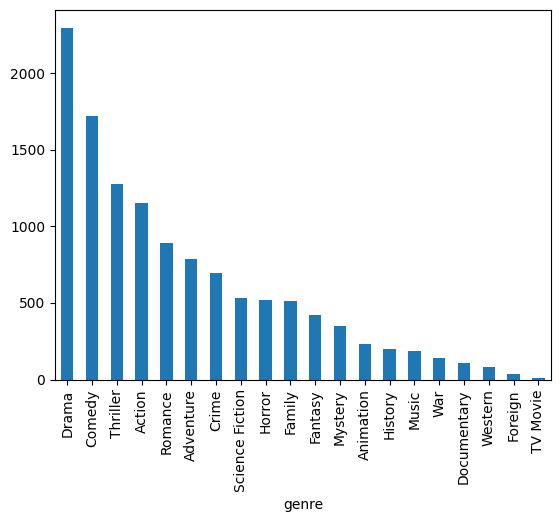

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12188 entries, 0 to 12187
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      12160 non-null  float64
 1   genre         12160 non-null  object 
 2   id            12188 non-null  int64  
 3   title         12188 non-null  object 
 4   popularity    12188 non-null  float64
 5   release_date  12187 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 571.4+ KB
None


In [63]:
# Usa right join para unir la tabla movie_to_genres con movies

union_right = movie_to_genres.merge(movies, left_on=('movie_id'), right_on='id', how='right')
print(union_right)

# Cuenta el número de generos, columna 'genre'

generos = union_right['genre'].value_counts()
print(generos)

# Muestra el resultado en una gráfica de barras

generos.plot(kind='bar')
plt.show()

# Notar que movie_id es float y id es integer
print(union_right.info())


## Outer join
<p>Un aspecto interesante de usar un <b>outer join</b> es que, debido a que devuelve todas las filas de las tablas combinadas y nulas donde no coinciden, puedes usarla para buscar filas que no tienen una coincidencia en la otra tabla. Para ver su funcionalidad, vamos a utilizar los datos de una lista de actores de dos películas populares: Iron Man 1 y Iron Man 2. La mayoría de los actores interpretaron a ambas películas. Utiliza un <code>outer join</code> para encontrar actores que no actuaron en ambas películas</p>
<p>
<img src=https://files.realpython.com/media/join_diagram.93e6ef63afbe.png width="350">
</p>

In [67]:
# Importar datasets

iron_man_actors_1 = pd.read_excel('Data/iron_man_actors.xlsx', sheet_name='Sheet1')
iron_man_actors_2 = pd.read_excel('Data/iron_man_actors.xlsx', sheet_name='Sheet2')

display(iron_man_actors_1)
display(iron_man_actors_2)

,character,id,name
0,Tony Stark / Iron Man,3223,Robert Downey Jr.
1,War Machine,18288,Terrence Howard
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges
3,Yinsen,17857,Shaun Toub
4,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
...,...,...,...
82,Reporter (uncredited),1209728,Chris Reid
83,News Cameraman (uncredited),1209729,Toi Rose
84,Rooftop Fireman (uncredited),1209730,George F. Watson
85,Whiplash One (voice) (uncredited),1209731,David Zyler


,character,id,name
0,Tony Stark / Iron Man,3223,Robert Downey Jr.
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
2,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",1896,Don Cheadle
3,Natalie Rushman / Natasha Romanoff / Black Widow,1245,Scarlett Johansson
4,Ivan Vanko / Whiplash,2295,Mickey Rourke
...,...,...,...
108,US Senator (uncredited),1265840,Michael A. Templeton
109,Background (uncredited),1265841,Rosa Tyabji
110,Tony Stark Usher (uncredited),1122811,Peter Sebastian Wrobel
111,Expo Attendee (uncredited),1205141,Maria Zambrana


In [78]:
# Une la tabla iron_man_1 con la tabla iron_man_2, no olvides usar sufijos ('_1', '_2')

iron_man = iron_man_actors_1.merge(iron_man_actors_2, on='id', how='outer', suffixes=('_1', '_2'))
display(iron_man)

# Crea una condición que devuelva verdadero si name_1 o name_2 son nulos (nota, si ambos son False, es decir hay actor en ambos entonces se rechaza)
# Hint, suma los dataFrames
filtro = (iron_man['name_1'].isna()) | (iron_man['name_2'].isna()) 

# Imprime los actores que NO actuaron en ambas peliculas (Utiliza el indice creado previamente)
display(iron_man[filtro])


# Imprime los actores que SI actuaron en ambas peliculas (Utiliza el indice creado previamente)
display(iron_man[~filtro])


,character_1,id,name_1,character_2,name_2
0,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
1,NaN,1245,NaN,Natalie Rushman / Natasha Romanoff / Black Widow,Scarlett Johansson
2,NaN,1896,NaN,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",Don Cheadle
3,Director Nick Fury,2231,Samuel L. Jackson,Director Nick Fury,Samuel L. Jackson
4,NaN,2295,NaN,Ivan Vanko / Whiplash,Mickey Rourke
...,...,...,...,...,...
184,NaN,1265840,NaN,US Senator (uncredited),Michael A. Templeton
185,NaN,1265841,NaN,Background (uncredited),Rosa Tyabji
186,Reporter (uncredited),1429470,Nick W. Nicholson,Stark Expo Attendee (uncredited),Nick W. Nicholson
187,Colonel Craig,1209702 T,homas Craig Plumer,NaN,NaN


,character_1,id,name_1,character_2,name_2
0,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
1,NaN,1245,NaN,Natalie Rushman / Natasha Romanoff / Black Widow,Scarlett Johansson
2,NaN,1896,NaN,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",Don Cheadle
4,NaN,2295,NaN,Ivan Vanko / Whiplash,Mickey Rourke
7,NaN,6807,NaN,Justin Hammer,Sam Rockwell
...,...,...,...,...,...
183,NaN,1265839,NaN,Model (uncredited),Grace Stanley
184,NaN,1265840,NaN,US Senator (uncredited),Michael A. Templeton
185,NaN,1265841,NaN,Background (uncredited),Rosa Tyabji
187,Colonel Craig,1209702 T,homas Craig Plumer,NaN,NaN


,character_1,id,name_1,character_2,name_2
3,Director Nick Fury,2231,Samuel L. Jackson,Director Nick Fury,Samuel L. Jackson
5,Tony Stark / Iron Man,3223,Robert Downey Jr.,Tony Stark / Iron Man,Robert Downey Jr.
6,J.A.R.V.I.S. (voice),6162,Paul Bettany,J.A.R.V.I.S. (voice),Paul Bettany
8,Stan Lee,7624,Stan Lee,Himself,Stan Lee
9,Agent Phil Coulson,9048,Clark Gregg,Agent Phil Coulson,Clark Gregg
10,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow,"Virginia ""Pepper"" Potts",Gwyneth Paltrow
13,Happy Hogan,15277,Jon Favreau,Happy Hogan,Jon Favreau
20,Major Allen,40275,Tim Guinee,Major Allen,Tim Guinee
24,Christine Everhart,57451,Leslie Bibb,Christine Everhart,Leslie Bibb
112,CAOC Analyst,1209714,James Bethea,Security Force #1,James Bethea


Exportar a .csv

In [80]:
iron_man.to_csv('Data/Example_Exported_from_iron_man_class_8.csv', index=False)